#### Tank 22MT02  - 20 tonne tank 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [32]:
uploaded = pd.read_csv('Bev Base Dearation Data Extract .csv')
# Dataset is now stored in a Pandas Dataframe

In [33]:
#uploaded.head()

In [34]:
# Or rename the existing DataFrame (rather than creating a copy)
uploaded.rename(columns={'SKU': 'Material','Deaeration Phase':'Deaeration_Phase'}, inplace=True)

In [35]:
# Removal of unwanted columns from dataset
uploaded1=uploaded.drop(['SKU_DESCRIPTION', 'Recipe', 'Tank','Source', 'Batch_Phase_Type','Phase_start','Phase_end','Deaeration_Phase','Phase_row_no','Instruction_Step','Material_Name','Target_Phase_duration','Target_Flowrate'], axis=1)

In [36]:
# Define a dictionary of replacements
replacements = {
    'U_25MT02': '2502',
    'U_25MT03': '2503',
    'U_25MT04': '2504',
    'U_26MT01' : '2601',
    'U_23MT02' : '2302',
    'U_23MT04' : '2304',
    'U_25MT01' : '2501',
    'U_23MT05' : '2305',
    'U_25MT02' : '2502',
    'U_22MT04' : '2204',
    'U_22MT03' : '2203',
    'U_22MT02' : '2202',
    'U_26MT04' : '2604',
    'U_26MT03' : '2603',
    'U_23MT03' : '2303',
    'U_22MT05' : '2205'
}

# Replace values in the 'TankName' column
uploaded1['Unit'].replace(replacements, inplace=True)

# Print the modified DataFrame
#print(uploaded1)

In [37]:
#uploaded1.info()

In [38]:
#Select the batches where 22MT03 tanks was used
Unit = ['2202']
TANK_2202= uploaded1[uploaded1['Unit'].isin(Unit)]
print(TANK_2202)

      Material    BATCHID  Unit Material_ID  Quantity  Phase_duration  \
2001   1397022  107956670  2202         NaN     0.000               0   
2002   1397022  107956670  2202     1002565  8623.000              10   
2003   1397022  107956670  2202         NaN     0.000              20   
2004   1397022  107956670  2202     1037802    19.446              17   
2005   1397022  107956670  2202     1002818   516.000               8   
...        ...        ...   ...         ...       ...             ...   
7746   1775253  108026760  2202         NaN     0.000               1   
7747   1775253  108026760  2202         NaN     0.000               8   
7748   1775253  108026760  2202         NaN     0.000               0   
7749   1775253  108026760  2202         NaN     0.000               0   
7750   1775253  108026760  2202         NaN     0.000               0   

      Phase_start_delay  Flowrate_KGMIN  Phase_overrun  
2001                  0          0.0000            NaN  
2002     

In [68]:
TANK_2202.corr()

,Material,BATCHID,Quantity,Phase_duration,Phase_start_delay,Flowrate_KGMIN,Phase_overrun
Material,1.000000,-0.308888,0.001113,0.032288,0.026695,0.016617,0.038067
BATCHID,-0.308888,1.000000,-0.001078,-0.084428,0.003673,-0.029675,-0.042213
Quantity,0.001113,-0.001078,1.000000,0.158787,-0.038514,0.532563,-0.011290
Phase_duration,0.032288,-0.084428,0.158787,1.000000,-0.042091,-0.057062,0.973910
Phase_start_delay,0.026695,0.003673,-0.038514,-0.042091,1.000000,-0.018299,-0.038922
Flowrate_KGMIN,0.016617,-0.029675,0.532563,-0.057062,-0.018299,1.000000,-0.101635
Phase_overrun,0.038067,-0.042213,-0.011290,0.973910,-0.038922,-0.101635,1.000000


In [39]:
Material=TANK_2202.Material.value_counts()
Material

1775253    94
1648637    49
1428047    43
1520984    42
1397022    35
1451704    19
1451710     9
Name: Material, dtype: int64

### Creation Dataframes based on the ingredients addition - quantity , flow rates , duration times , overrun times and targets for each 

### Ingredients addition

## Treated Water- 2 phase additions with different quantities
MAjority of additions are treated water bulk additions 
NB : Need to separate out the water additions

In [40]:
#Select all the rows where the phase HP is in the list below - HP is homogenisation of the final batch quantity
Material_ID = ['1002565']
df_IDW_2202 = TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
print(df_IDW_2202)

      Material    BATCHID  Unit Material_ID   Quantity  Phase_duration  \
2002   1397022  107956670  2202     1002565   8623.000              10   
2012   1397022  107956670  2202     1002565   2065.000              13   
2755   1428047  107993270  2202     1002565   5101.000               8   
2760   1428047  107993270  2202     1002565     85.394               2   
2763   1428047  107993270  2202     1002565   4490.000               8   
2767   1428047  107993270  2202     1002565   1879.000              32   
2818   1428047  108033603  2202     1002565   5104.000               7   
2823   1428047  108033603  2202     1002565     85.000               2   
2826   1428047  108033603  2202     1002565   4491.000               7   
2830   1428047  108033603  2202     1002565   1886.000              32   
2976   1451704  108073632  2202     1002565   5979.000               9   
2984   1451704  108073632  2202     1002565   3126.000              10   
4041   1520984  108045117  2202     10

In [69]:
df_IDW_2202.corr()

,Material,BATCHID,WaterQuantity,WaterPhase_duration,WaterPhase_start_delay,WaterFlowrate_KGMIN,WaterPhase_overrun
Material,1.000000,-0.418475,0.342249,-0.010677,0.054867,0.183943,-0.037476
BATCHID,-0.418475,1.000000,-0.000991,0.149138,0.223400,-0.112222,0.152095
WaterQuantity,0.342249,-0.000991,1.000000,-0.091609,-0.049696,0.872374,-0.154631
WaterPhase_duration,-0.010677,0.149138,-0.091609,1.000000,0.645133,-0.405153,0.997584
WaterPhase_start_delay,0.054867,0.223400,-0.049696,0.645133,1.000000,-0.224607,0.645603
WaterFlowrate_KGMIN,0.183943,-0.112222,0.872374,-0.405153,-0.224607,1.000000,-0.455232
WaterPhase_overrun,-0.037476,0.152095,-0.154631,0.997584,0.645603,-0.455232,1.000000


In [41]:
import pandas as pd
# Assuming df_filtered1 DataFrames are defined
# Create a new column 'QuantityRange' in df_filtered1 based on the 'Quantity' values
df_IDW_2202['QuantityRange'] = pd.cut(df_IDW_2202['Quantity'], bins=2, labels=['QuantityRange <= 5000', 'QuantityRange >= 5000'])


<ipython-input-41-c1e0f843bdc8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IDW_2202['QuantityRange'] = pd.cut(df_IDW_2202['Quantity'], bins=2, labels=['QuantityRange <= 5000', 'QuantityRange >= 5000'])


In [42]:
# Or rename the existing DataFrame (rather than creating a copy)
df_IDW_2202.rename(columns={'Quantity': 'WaterQuantity','Phase_duration':'WaterPhase_duration','Phase_start_delay':'WaterPhase_start_delay','Flowrate_KGMIN':'WaterFlowrate_KGMIN','Phase_overrun':'WaterPhase_overrun','QuantityRange':'WaterQuantityRange'}, inplace=True)
print(df_IDW_2202)

      Material    BATCHID  Unit Material_ID  WaterQuantity  \
2002   1397022  107956670  2202     1002565       8623.000   
2012   1397022  107956670  2202     1002565       2065.000   
2755   1428047  107993270  2202     1002565       5101.000   
2760   1428047  107993270  2202     1002565         85.394   
2763   1428047  107993270  2202     1002565       4490.000   
2767   1428047  107993270  2202     1002565       1879.000   
2818   1428047  108033603  2202     1002565       5104.000   
2823   1428047  108033603  2202     1002565         85.000   
2826   1428047  108033603  2202     1002565       4491.000   
2830   1428047  108033603  2202     1002565       1886.000   
2976   1451704  108073632  2202     1002565       5979.000   
2984   1451704  108073632  2202     1002565       3126.000   
4041   1520984  108045117  2202     1002565      12478.000   
4047   1520984  108045117  2202     1002565       3994.000   
4845   1648637  107867810  2202     1002565       6067.000   
4851   1

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [43]:
df_IDW_2202.describe()

,Material,BATCHID,WaterQuantity,WaterPhase_duration,WaterPhase_start_delay,WaterFlowrate_KGMIN,WaterPhase_overrun
count,2.900000e+01,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000
mean,1.587341e+06,1.079837e+08,5074.013586,22.310345,1.620690,458.178148,14.620690
std,1.536906e+05,5.856128e+04,3681.340472,37.009751,5.010088,355.591735,37.119896
min,1.397022e+06,1.078678e+08,85.000000,2.000000,0.000000,3.717900,0.000000
25%,1.428047e+06,1.079567e+08,3126.000000,8.000000,0.000000,58.937500,0.000000
50%,1.648637e+06,1.079933e+08,4490.000000,12.000000,0.000000,561.250000,1.000000
75%,1.775253e+06,1.080336e+08,6064.000000,17.000000,1.000000,729.142900,10.000000
max,1.775253e+06,1.080736e+08,12478.000000,190.000000,21.000000,1039.833300,183.000000


In [71]:
df_IDW_2202.corr()

,Material,BATCHID,WaterQuantity,WaterPhase_duration,WaterPhase_start_delay,WaterFlowrate_KGMIN,WaterPhase_overrun
Material,1.000000,-0.418475,0.342249,-0.010677,0.054867,0.183943,-0.037476
BATCHID,-0.418475,1.000000,-0.000991,0.149138,0.223400,-0.112222,0.152095
WaterQuantity,0.342249,-0.000991,1.000000,-0.091609,-0.049696,0.872374,-0.154631
WaterPhase_duration,-0.010677,0.149138,-0.091609,1.000000,0.645133,-0.405153,0.997584
WaterPhase_start_delay,0.054867,0.223400,-0.049696,0.645133,1.000000,-0.224607,0.645603
WaterFlowrate_KGMIN,0.183943,-0.112222,0.872374,-0.405153,-0.224607,1.000000,-0.455232
WaterPhase_overrun,-0.037476,0.152095,-0.154631,0.997584,0.645603,-0.455232,1.000000


In [44]:
WaterQuantityRange = ['QuantityRange >= 5000']
df_Material_IDWater1= df_IDW_2202[df_IDW_2202['WaterQuantityRange'].isin(WaterQuantityRange)]
print(df_Material_IDWater1)

      Material    BATCHID  Unit Material_ID  WaterQuantity  \
2002   1397022  107956670  2202     1002565         8623.0   
4041   1520984  108045117  2202     1002565        12478.0   
7316   1775253  107899926  2202     1002565        11476.0   
7556   1775253  107964410  2202     1002565        11479.0   
7668   1775253  107999494  2202     1002565        11476.0   
7697   1775253  108026759  2202     1002565        11478.0   

      WaterPhase_duration  WaterPhase_start_delay  WaterFlowrate_KGMIN  \
2002                   10                       1             862.3000   
4041                   12                       3            1039.8333   
7316                   12                       0             956.3333   
7556                   12                       0             956.5833   
7668                   14                       0             819.7143   
7697                   12                       0             956.5000   

      WaterPhase_overrun     WaterQuantityRang

In [45]:
df_Material_IDWater1.describe()

,Material,BATCHID,WaterQuantity,WaterPhase_duration,WaterPhase_start_delay,WaterFlowrate_KGMIN,WaterPhase_overrun
count,6.000000e+00,6.000000e+00,6.000000,6.000000,6.000000,6.000000,6.000000
mean,1.669836e+06,1.079821e+08,11168.333333,12.000000,0.666667,931.877367,0.333333
std,1.679496e+05,5.287778e+04,1309.631500,1.264911,1.211060,78.601268,0.816497
min,1.397022e+06,1.078999e+08,8623.000000,10.000000,0.000000,819.714300,0.000000
25%,1.584551e+06,1.079586e+08,11476.000000,12.000000,0.000000,885.808325,0.000000
50%,1.775253e+06,1.079820e+08,11477.000000,12.000000,0.000000,956.416650,0.000000
75%,1.775253e+06,1.080199e+08,11478.750000,12.000000,0.750000,956.562475,0.000000
max,1.775253e+06,1.080451e+08,12478.000000,14.000000,3.000000,1039.833300,2.000000


In [46]:
WaterQuantityRange = ['QuantityRange <= 5000']
df_Material_IDWater2 = df_IDW_2202[df_IDW_2202['WaterQuantityRange'].isin(WaterQuantityRange)]
print(df_Material_IDWater2)

      Material    BATCHID  Unit Material_ID  WaterQuantity  \
2012   1397022  107956670  2202     1002565       2065.000   
2755   1428047  107993270  2202     1002565       5101.000   
2760   1428047  107993270  2202     1002565         85.394   
2763   1428047  107993270  2202     1002565       4490.000   
2767   1428047  107993270  2202     1002565       1879.000   
2818   1428047  108033603  2202     1002565       5104.000   
2823   1428047  108033603  2202     1002565         85.000   
2826   1428047  108033603  2202     1002565       4491.000   
2830   1428047  108033603  2202     1002565       1886.000   
2976   1451704  108073632  2202     1002565       5979.000   
2984   1451704  108073632  2202     1002565       3126.000   
4047   1520984  108045117  2202     1002565       3994.000   
4845   1648637  107867810  2202     1002565       6067.000   
4851   1648637  107867810  2202     1002565        145.000   
4853   1648637  107867810  2202     1002565       5722.000   
4912   1

In [47]:
df_Material_IDWater2.describe()

,Material,BATCHID,WaterQuantity,WaterPhase_duration,WaterPhase_start_delay,WaterFlowrate_KGMIN,WaterPhase_overrun
count,2.300000e+01,2.300000e+01,23.000000,23.000000,23.000000,23.000000,23.000000
mean,1.565821e+06,1.079841e+08,3484.191043,25.000000,1.869565,334.604439,18.347826
std,1.459860e+05,6.106010e+04,2021.589169,41.308155,5.594676,286.991953,41.028381
min,1.397022e+06,1.078678e+08,85.000000,2.000000,0.000000,3.717900,0.000000
25%,1.428047e+06,1.079605e+08,1975.500000,8.000000,0.000000,58.349300,0.000000
50%,1.520984e+06,1.079933e+08,3598.000000,10.000000,0.000000,276.769200,4.000000
75%,1.648637e+06,1.080336e+08,5102.500000,22.500000,0.500000,639.598200,16.000000
max,1.775253e+06,1.080736e+08,6067.000000,190.000000,21.000000,758.375000,183.000000


## Addition of Preservative - 1037802- Pres1- Only used in 3 batches 

In [48]:
Material_ID = ['1037802']
df_IDP1_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
df_IDP1_2202.rename(columns={'Quantity': 'Pres1Quantity','Phase_duration':'Pres1Phase_duration','Phase_start_delay':'Pres1Phase_start_delay','Flowrate_KGMIN':'Pres1Flowrate_KGMIN','Phase_overrun':'Pres1Phase_overrun'}, inplace=True)
#print(df_IDP1_2202)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [49]:
# Or rename the existing DataFrame (rather than creating a copy)
df_IDP1_2202.rename(columns={'Quantity': 'Pres1Quantity','Phase_duration':'Pres1Phase_duration','Phase_start_delay':'Pres1Phase_start_delay','Flowrate_KGMIN':'Pres1Flowrate_KGMIN','Phase_overrun':'Pres1Phase_overrun'}, inplace=True)

In [50]:
#Aggregate data per tank
aggregated_df_IDP1_2202 = df_IDP1_2202.groupby('Material').agg({
    'Pres1Phase_duration': 'mean',
    'Pres1Phase_overrun': 'sum',
    'Pres1Phase_start_delay':'sum',
    'Pres1Quantity':'sum',
    'Pres1Flowrate_KGMIN':'sum',
    
}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDP1_2202)

In [51]:
df_IDP1_2202.describe()

,Material,BATCHID,Pres1Quantity,Pres1Phase_duration,Pres1Phase_start_delay,Pres1Flowrate_KGMIN,Pres1Phase_overrun
count,3.000000e+00,3.000000e+00,3.000000,3.000000,3.0,3.000000,3.000000
mean,1.417705e+06,1.079945e+08,17.867000,18.666667,0.0,2.438200,15.666667
std,1.791229e+04,3.848159e+04,1.367511,16.563011,0.0,2.841753,16.563011
min,1.397022e+06,1.079567e+08,17.065000,3.000000,0.0,0.474000,0.000000
25%,1.412534e+06,1.079750e+08,17.077500,10.000000,0.0,0.808950,7.000000
50%,1.428047e+06,1.079933e+08,17.090000,17.000000,0.0,1.143900,14.000000
75%,1.428047e+06,1.080134e+08,18.268000,26.500000,0.0,3.420300,23.500000
max,1.428047e+06,1.080336e+08,19.446000,36.000000,0.0,5.696700,33.000000


## Addition of Preservative - 1002818- Pres2

In [52]:
Material_ID = ['1002818']
df_IDP2_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
df_IDP2_2202.rename(columns={'Quantity':'Pres2Quantity','Phase_duration':'Pres2Phase_duration','Phase_start_delay':'Pres2Phase_start_delay','Flowrate_KGMIN':'Pres2Flowrate_KGMIN','Phase_overrun':'Pres2Phase_overrun'}, inplace=True)
print(df_IDP2_2202)

      Material    BATCHID  Unit Material_ID  Pres2Quantity  \
2005   1397022  107956670  2202     1002818        516.000   
2758   1428047  107993270  2202     1002818         68.326   
2821   1428047  108033603  2202     1002818         68.382   
2979   1451704  108073632  2202     1002818         48.321   
4044   1520984  108045117  2202     1002818         75.010   
4848   1648637  107867810  2202     1002818         57.235   
4915   1648637  107978116  2202     1002818         57.231   
7319   1775253  107899926  2202     1002818        120.925   
7559   1775253  107964410  2202     1002818        120.795   
7671   1775253  107999494  2202     1002818        120.863   
7700   1775253  108026759  2202     1002818        120.698   

      Pres2Phase_duration  Pres2Phase_start_delay  Pres2Flowrate_KGMIN  \
2005                    8                       0              64.5000   
2758                    3                       0              22.7753   
2821                    6        

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [53]:
df_IDP2_2202.describe()

,Material,BATCHID,Pres2Quantity,Pres2Phase_duration,Pres2Phase_start_delay,Pres2Flowrate_KGMIN,Pres2Phase_overrun
count,1.100000e+01,1.100000e+01,11.000000,11.000000,11.0,11.000000,11.000000
mean,1.602190e+06,1.079853e+08,124.889636,8.909091,0.0,20.024209,2.636364
std,1.600324e+05,6.172350e+04,133.015682,8.993937,0.0,17.531909,7.800932
min,1.397022e+06,1.078678e+08,48.321000,2.000000,0.0,1.635200,0.000000
25%,1.439876e+06,1.079605e+08,62.780500,5.500000,0.0,10.325850,0.000000
50%,1.648637e+06,1.079933e+08,75.010000,7.000000,0.0,17.256400,0.000000
75%,1.775253e+06,1.080302e+08,120.829000,8.000000,0.0,21.445800,0.000000
max,1.775253e+06,1.080736e+08,516.000000,35.000000,0.0,64.500000,26.000000


In [54]:
#Aggregate data per tank
#aggregated_df_IDP2_2202 = df_IDP2_2202.groupby('Material').agg({
    #'Pres2Phase_duration': 'mean',
    #'Pres2Phase_overrun': 'sum',
    #'Pres2Phase_start_delay':'sum',
    #'Pres2Quantity':'sum',
   # 'Pres2Flowrate_KGMIN':'sum',
   # 'Target_Phase_duration':'sum',
   # 'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDP2_2202)

## Addition of GUM (1461896,1234972,1031006)

In [55]:
Material_ID = ['1461896','1254972','1031006','1243269']
df_IDGUM_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
# Or rename the existing DataFrame (rather than creating a copy)
df_IDGUM_2202.rename(columns={'Quantity': 'GUMQuantity','Phase_duration':'GUMPhase_duration','Phase_start_delay':'GUMPhase_start_delay','Flowrate_KGMIN':'GUMFlowrate_KGMIN','Phase_overrun':'GUMPhase_overrun'}, inplace=True)
print(df_IDGUM_2202)

      Material    BATCHID  Unit Material_ID  GUMQuantity  GUMPhase_duration  \
2008   1397022  107956670  2202     1461896     3500.000                 45   
2010   1397022  107956670  2202     1254972      396.000                 15   
2761   1428047  107993270  2202     1461896     1500.000                 24   
2765   1428047  107993270  2202     1461896     2000.000                 56   
2824   1428047  108033603  2202     1461896     1500.000                 28   
2828   1428047  108033603  2202     1461896     2000.000                 10   
2981   1451704  108073632  2202     1461896     2000.000                 58   
2982   1451704  108073632  2202     1254972       19.350                414   
4045   1520984  108045117  2202     1461896     1500.000                155   
4849   1648637  107867810  2202     1461896     1000.000                462   
4850   1648637  107867810  2202     1254972      144.778                  5   
4916   1648637  107978116  2202     1461896     1000

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [56]:
df_IDGUM_2202.describe()

,Material,BATCHID,GUMQuantity,GUMPhase_duration,GUMPhase_start_delay,GUMFlowrate_KGMIN,GUMPhase_overrun
count,1.700000e+01,1.700000e+01,17.000000,17.000000,17.000000,17.000000,17.000000
mean,1.566246e+06,1.079848e+08,1688.536941,170.117647,0.117647,40.431765,139.882353
std,1.507992e+05,6.273377e+04,1138.241710,270.826947,0.332106,46.655401,265.049496
min,1.397022e+06,1.078678e+08,19.350000,5.000000,0.000000,0.046700,0.000000
25%,1.428047e+06,1.079567e+08,1000.000000,24.000000,0.000000,9.677400,0.000000
50%,1.520984e+06,1.079933e+08,1500.000000,56.000000,0.000000,32.258100,11.000000
75%,1.648637e+06,1.080336e+08,3000.000000,155.000000,0.000000,44.776100,127.000000
max,1.775253e+06,1.080736e+08,3500.000000,1030.000000,1.000000,200.000000,974.000000


In [72]:
df_IDGUM_2202.corr()

,Material,BATCHID,GUMQuantity,GUMPhase_duration,GUMPhase_start_delay,GUMFlowrate_KGMIN,GUMPhase_overrun
Material,1.000000,-0.395928,0.280685,0.435907,-0.344937,-0.378467,0.410501
BATCHID,-0.395928,1.000000,0.063707,-0.303966,0.171703,0.228932,-0.308162
GUMQuantity,0.280685,0.063707,1.000000,0.221054,0.020324,0.226072,0.161820
GUMPhase_duration,0.435907,-0.303966,0.221054,1.000000,-0.212798,-0.436386,0.997770
GUMPhase_start_delay,-0.344937,0.171703,0.020324,-0.212798,1.000000,0.732664,-0.198641
GUMFlowrate_KGMIN,-0.378467,0.228932,0.226072,-0.436386,0.732664,1.000000,-0.434507
GUMPhase_overrun,0.410501,-0.308162,0.161820,0.997770,-0.198641,-0.434507,1.000000


In [57]:
#Aggregate data per tank
#aggregated_df_IDGUM_2202= df_IDGUM_2202.groupby('Material').agg({
    #'GUMPhase_duration': 'mean',
   # 'GUMPhase_overrun': 'sum',
   # 'GUMPhase_start_delay':'sum',
   # 'GUMQuantity':'sum',
   # 'GUMFlowrate_KGMIN':'sum',
    #'Target_Phase_duration':'sum',
    #'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDGUM_2202)

## Addition of Preservative - 1002874- Pres3

In [58]:
Material_ID = ['1002874']
df_IDP3_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
# Or rename the existing DataFrame (rather than creating a copy)
df_IDP3_2202.rename(columns={'Quantity': 'Pres3Quantity','Phase_duration':'Pres3Phase_duration','Phase_start_delay':'Pres3Phase_start_delay','Flowrate_KGMIN':'Pres3Flowrate_KGMIN','Phase_overrun':'Pres3Phase_overrun'}, inplace=True)
print(df_IDP3_2202)

      Material    BATCHID  Unit Material_ID  Pres3Quantity  \
2978   1451704  108073632  2202     1002874         12.620   
4043   1520984  108045117  2202     1002874         20.010   
4847   1648637  107867810  2202     1002874         15.287   
4914   1648637  107978116  2202     1002874         15.264   
7318   1775253  107899926  2202     1002874         27.107   
7558   1775253  107964410  2202     1002874         27.008   
7670   1775253  107999494  2202     1002874         27.119   
7699   1775253  108026759  2202     1002874         27.107   

      Pres3Phase_duration  Pres3Phase_start_delay  Pres3Flowrate_KGMIN  \
2978                  206                       0               0.0613   
4043                   24                       0               0.8338   
4847                    7                       0               2.1839   
4914                   10                       0               1.5264   
7318                   13                       1               2.0852 

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [59]:
df_IDP3_2202.describe()

,Material,BATCHID,Pres3Quantity,Pres3Phase_duration,Pres3Phase_start_delay,Pres3Flowrate_KGMIN,Pres3Phase_overrun
count,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.671372e+06,1.079819e+08,21.440250,35.750000,0.125000,2.084612,32.625000
std,1.282127e+05,7.049773e+04,6.361976,69.017079,0.353553,1.357512,69.477514
min,1.451704e+06,1.078678e+08,12.620000,6.000000,0.000000,0.061300,2.000000
25%,1.616724e+06,1.079483e+08,15.281250,8.500000,0.000000,1.353250,5.000000
50%,1.711945e+06,1.079888e+08,23.509000,10.500000,0.000000,2.134550,7.500000
75%,1.775253e+06,1.080313e+08,27.107000,15.750000,0.000000,2.594775,12.000000
max,1.775253e+06,1.080736e+08,27.119000,206.000000,1.000000,4.517800,204.000000


In [60]:
#Aggregate data per tank
#aggregated_df_IDP3_2202 = df_IDP3_2202.groupby('Material').agg({
   # 'Pres3Phase_duration': 'mean',
    #'Pres3Phase_overrun': 'sum',
    #'Pres3Phase_start_delay':'sum',
    #'Pres3Quantity':'sum',
    #'Pres3Flowrate_KGMIN':'sum',
    #'Target_Phase_duration':'sum',
    #'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDP3_2202)

## Colour Addition - There are only 3 batches that have colour ingredients included that were produced in Tank 2202

In [61]:
#Material_ID = ['3026582','3010810','3028657']
#df_IDCOL_2202=TANK_2202[TANK_2202['Material_ID'].isin(Material_ID)]
#print(df_IDCOL_2202)

In [62]:
# Or rename the existing DataFrame (rather than creating a copy)
#df_IDCOL_2202.rename(columns={'Quantity': 'COLQuantity','Phase_duration':'COLPhase_duration','Phase_start_delay':'COLPhase_start_delay','Flowrate_KGMIN':'COLFlowrate_KGMIN','Phase_overrun':'COLPhase_overrun'}, inplace=True)

In [63]:
#Aggregate data per tank
#aggregated_df_IDCOL_2202 = df_IDCOL_2202.groupby('Material').agg({
    #'COLPhase_duration': 'mean',
    #'COLPhase_overrun': 'sum',
   # 'COLPhase_start_delay':'sum',
   # 'COLQuantity':'sum',
   # 'COLFlowrate_KGMIN':'sum',
   # 'Target_Phase_duration':'sum',
   # 'Target_Flowrate':'sum'
#}).reset_index()

 #Print the aggregated DataFrame
#print(aggregated_df_IDCOL_2202)

In [74]:
frames = [df_IDW_2202,df_IDGUM_2202,df_IDP2_2202,df_IDP3_2202,df_IDP1_2202]

result = pd.concat(frames)
print(result)

      Material    BATCHID  Unit Material_ID  WaterQuantity  \
2002   1397022  107956670  2202     1002565       8623.000   
2012   1397022  107956670  2202     1002565       2065.000   
2755   1428047  107993270  2202     1002565       5101.000   
2760   1428047  107993270  2202     1002565         85.394   
2763   1428047  107993270  2202     1002565       4490.000   
...        ...        ...   ...         ...            ...   
7670   1775253  107999494  2202     1002874            NaN   
7699   1775253  108026759  2202     1002874            NaN   
2004   1397022  107956670  2202     1037802            NaN   
2757   1428047  107993270  2202     1037802            NaN   
2820   1428047  108033603  2202     1037802            NaN   

      WaterPhase_duration  WaterPhase_start_delay  WaterFlowrate_KGMIN  \
2002                 10.0                     1.0             862.3000   
2012                 13.0                     0.0             158.8462   
2755                  8.0        

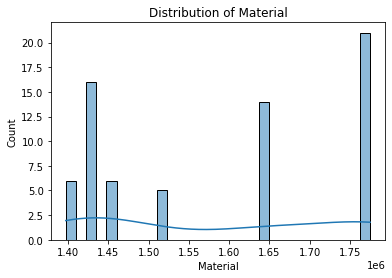

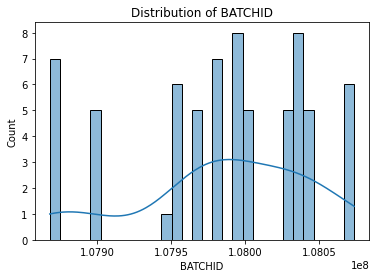

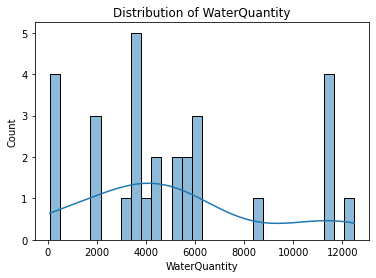

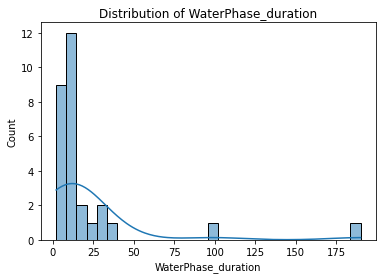

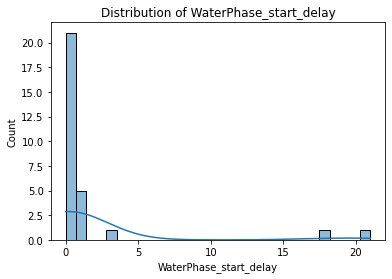

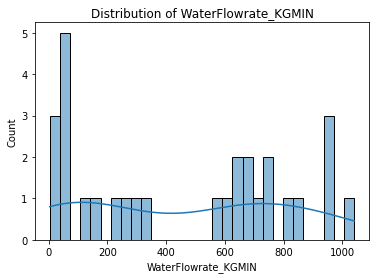

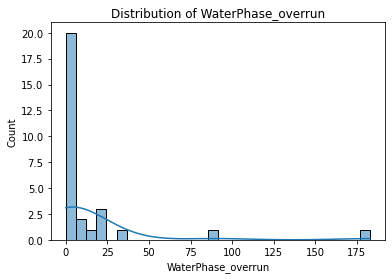

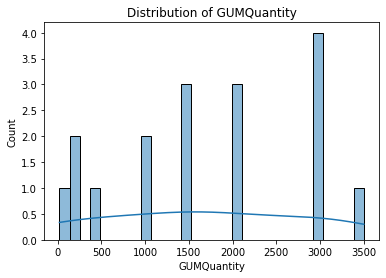

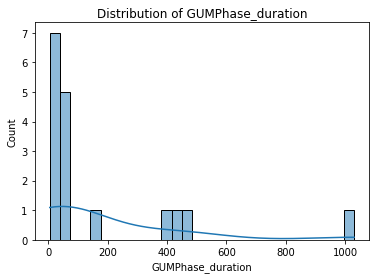

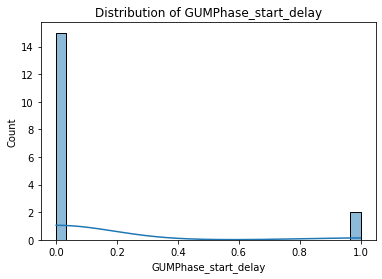

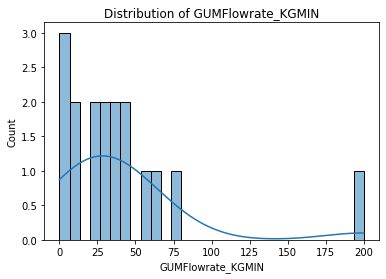

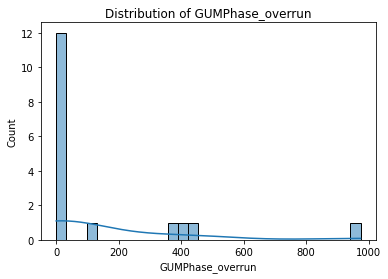

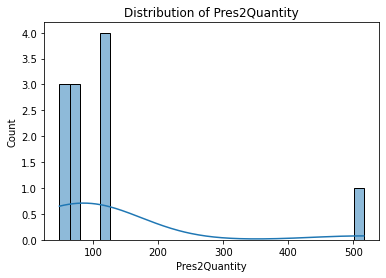

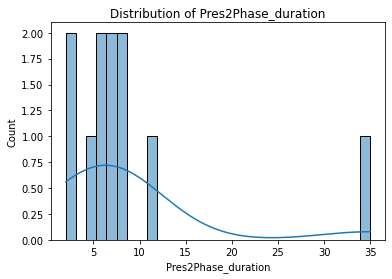

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


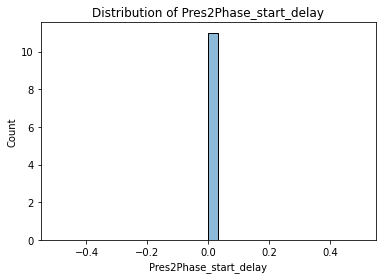

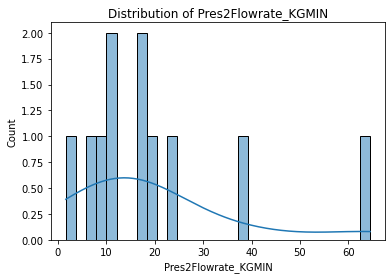

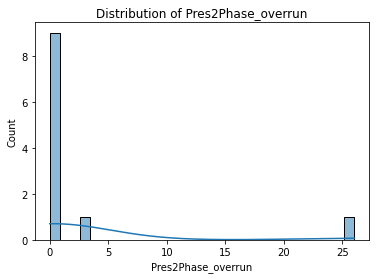

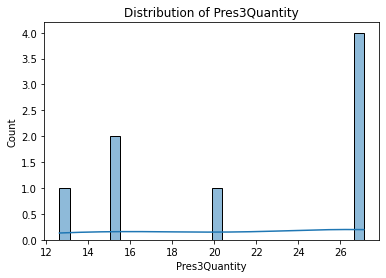

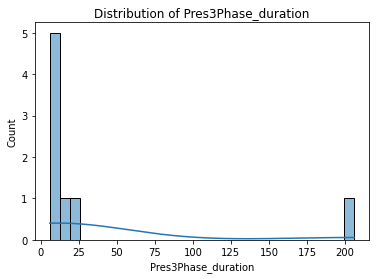

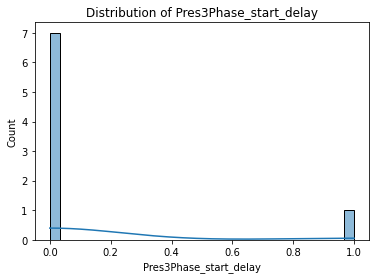

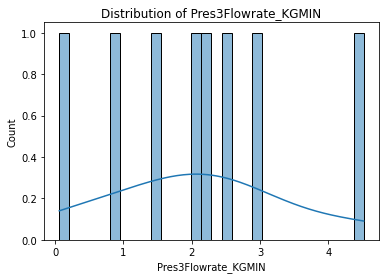

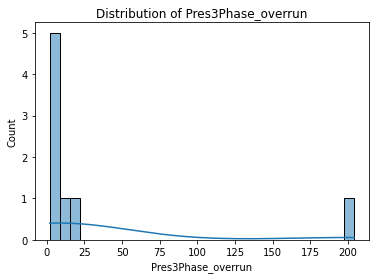

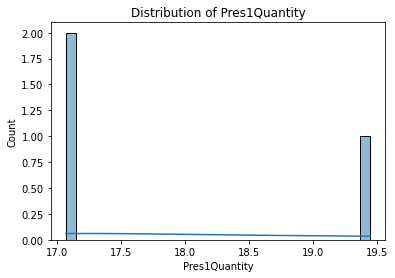

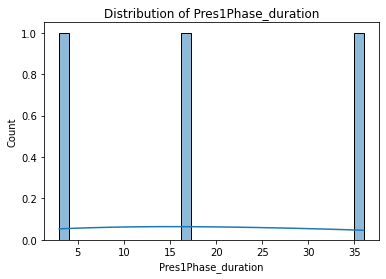

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


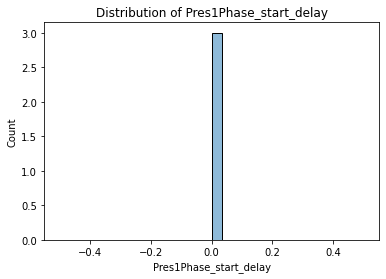

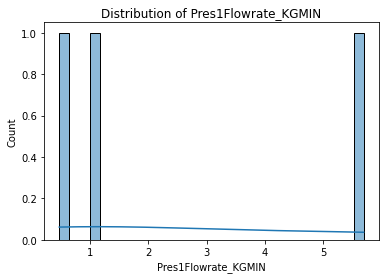

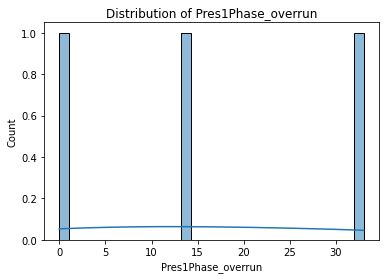

In [75]:
numerical_columns = result.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    sns.histplot(data=result, x=col, bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [76]:
result.describe()

,Material,BATCHID,WaterQuantity,WaterPhase_duration,WaterPhase_start_delay,WaterFlowrate_KGMIN,WaterPhase_overrun,GUMQuantity,GUMPhase_duration,GUMPhase_start_delay,...,Pres3Quantity,Pres3Phase_duration,Pres3Phase_start_delay,Pres3Flowrate_KGMIN,Pres3Phase_overrun,Pres1Quantity,Pres1Phase_duration,Pres1Phase_start_delay,Pres1Flowrate_KGMIN,Pres1Phase_overrun
count,6.800000e+01,6.800000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,17.000000,17.000000,17.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,3.000000,3.000000,3.0,3.000000,3.000000
mean,1.586871e+06,1.079845e+08,5074.013586,22.310345,1.620690,458.178148,14.620690,1688.536941,170.117647,0.117647,...,21.440250,35.750000,0.125000,2.084612,32.625000,17.867000,18.666667,0.0,2.438200,15.666667
std,1.520917e+05,5.925210e+04,3681.340472,37.009751,5.010088,355.591735,37.119896,1138.241710,270.826947,0.332106,...,6.361976,69.017079,0.353553,1.357512,69.477514,1.367511,16.563011,0.0,2.841753,16.563011
min,1.397022e+06,1.078678e+08,85.000000,2.000000,0.000000,3.717900,0.000000,19.350000,5.000000,0.000000,...,12.620000,6.000000,0.000000,0.061300,2.000000,17.065000,3.000000,0.0,0.474000,0.000000
25%,1.428047e+06,1.079567e+08,3126.000000,8.000000,0.000000,58.937500,0.000000,1000.000000,24.000000,0.000000,...,15.281250,8.500000,0.000000,1.353250,5.000000,17.077500,10.000000,0.0,0.808950,7.000000
50%,1.648637e+06,1.079933e+08,4490.000000,12.000000,0.000000,561.250000,1.000000,1500.000000,56.000000,0.000000,...,23.509000,10.500000,0.000000,2.134550,7.500000,17.090000,17.000000,0.0,1.143900,14.000000
75%,1.775253e+06,1.080336e+08,6064.000000,17.000000,1.000000,729.142900,10.000000,3000.000000,155.000000,0.000000,...,27.107000,15.750000,0.000000,2.594775,12.000000,18.268000,26.500000,0.0,3.420300,23.500000
max,1.775253e+06,1.080736e+08,12478.000000,190.000000,21.000000,1039.833300,183.000000,3500.000000,1030.000000,1.000000,...,27.119000,206.000000,1.000000,4.517800,204.000000,19.446000,36.000000,0.0,5.696700,33.000000


In [77]:
#always remember your magic function if using Jupyter
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(result)
plt.show()

ValueError: could not convert string to float: 'QuantityRange >= 5000'

In [ ]:
sns.regplot(x='Pres3Phase_duration',y='Pres3Phase_overrun',data=result)

## Effect of Agitation after ingredient addition

In [ ]:
#Select all the rows where the material is in the list below
Instruction_Step = ['STEP1_AGITATION','STEP2_AGITATION']
df_Agitation = TANK_2202[TANK_2202['Instruction_Step'].isin(Instruction_Step)]
#print(df_Agitation)

In [ ]:
#Aggregate data per tank
aggregated_df_Agitation = df_Agitation.groupby('Material').agg({
    'Phase_duration': 'mean',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'sum',
    'Target_Flowrate':'sum'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_df_Agitation)